In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import joblib

In [2]:
df = pd.read_csv('../data/job_en_with_skills.csv') 
skill_df = pd.read_csv('../data/skill.csv')

In [3]:
df.head()

,city_text,exp,item_tag,company_scale,company_field,position,education,min_salary,max_salary,average_salary,platform,job_des,job_require,skills,group_skill
0,Hà Nội,3.0,Product Owner,NaN,Information technology,Staff,bachelor,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc Navigos Search's Client is loo...,Yêu cầu công việc - A Bachelor’s degree in a r...,"agile, blockchain, data, go, performance, qa, ...","Data Systems, Languages, OS & Infrastructure, ..."
1,"Hà Nội, Đà Nẵng",6.0,Technical Lead (Nextjs & Nestjs) Remote,NaN,Information technology,Team leader,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc What You'll Be Doing • Lead ar...,Yêu cầu công việc • 6+ years of full-stack dev...,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS..."
2,"Hà Nội, Đà Nẵng",6.0,Technical Lead (Nextjs & Nestjs)_Remote,NaN,Information technology,Team leader,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc What You'll Be Doing • Lead ar...,Yêu cầu công việc • 6+ years of full-stack dev...,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS..."
3,Hà Nội,3.5,Editorial - Retouch Specialist,NaN,Information technology,Staff,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việcTOP 4 JOB RESPONSIBILITIES Qual...,Yêu cầu công việcRequirements & Experience • 3...,NaN,NaN
4,Hồ Chí Minh,8.0,116935 - Principal Backend Engineer - IT softw...,NaN,Information technology,Staff,NaN,97000000.0,100000000.0,98500000.0,careerviet,Mô tả Công việc - Work Location: Phu N...,YÊU CẦU CÔNG VIỆC <Necessary Skill / Experienc...,"agile, architecture, design, docker, express, ...","Languages, Libs & Frameworks, OS & Infrastruct..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city_text       3044 non-null   object 
 1   exp             3047 non-null   float64
 2   item_tag        3046 non-null   object 
 3   company_scale   2249 non-null   object 
 4   company_field   3047 non-null   object 
 5   position        3047 non-null   object 
 6   education       2735 non-null   object 
 7   min_salary      3047 non-null   float64
 8   max_salary      3047 non-null   float64
 9   average_salary  3047 non-null   float64
 10  platform        3047 non-null   object 
 11  job_des         3046 non-null   object 
 12  job_require     3047 non-null   object 
 13  skills          2722 non-null   object 
 14  group_skill     2722 non-null   object 
dtypes: float64(4), object(11)
memory usage: 357.2+ KB


In [5]:
df.describe()

,exp,min_salary,max_salary,average_salary
count,3047.000000,3.047000e+03,3.047000e+03,3.047000e+03
mean,1.976567,1.840352e+07,2.724740e+07,2.282546e+07
std,1.455078,1.251857e+07,1.719319e+07,1.387888e+07
min,0.000000,1.000000e+06,1.000000e+06,2.000000e+06
25%,1.000000,1.000000e+07,1.500000e+07,1.350000e+07
50%,2.000000,1.500000e+07,2.500000e+07,1.950000e+07
75%,3.000000,2.387500e+07,3.500000e+07,2.850000e+07
max,16.000000,9.700000e+07,1.274250e+08,1.000000e+08


In [6]:
# df missing 
df.isnull().sum()

city_text           3
exp                 0
item_tag            1
company_scale     798
company_field       0
position            0
education         312
min_salary          0
max_salary          0
average_salary      0
platform            0
job_des             1
job_require         0
skills            325
group_skill       325
dtype: int64

# EDA

## Định tính

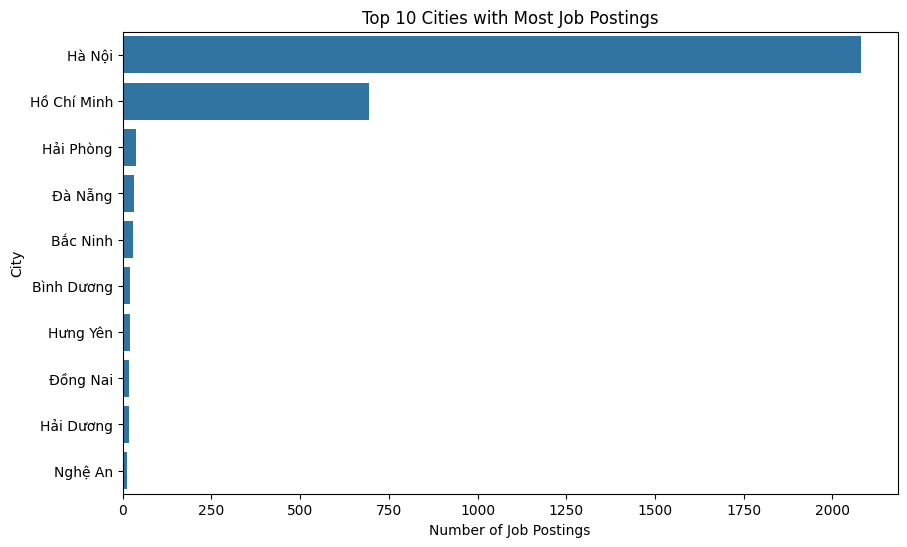

In [7]:
# plot city_text with first value before comma
city_counts = df['city_text'].str.split(',', expand=True)[0].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 10 Cities with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('City')
plt.show()

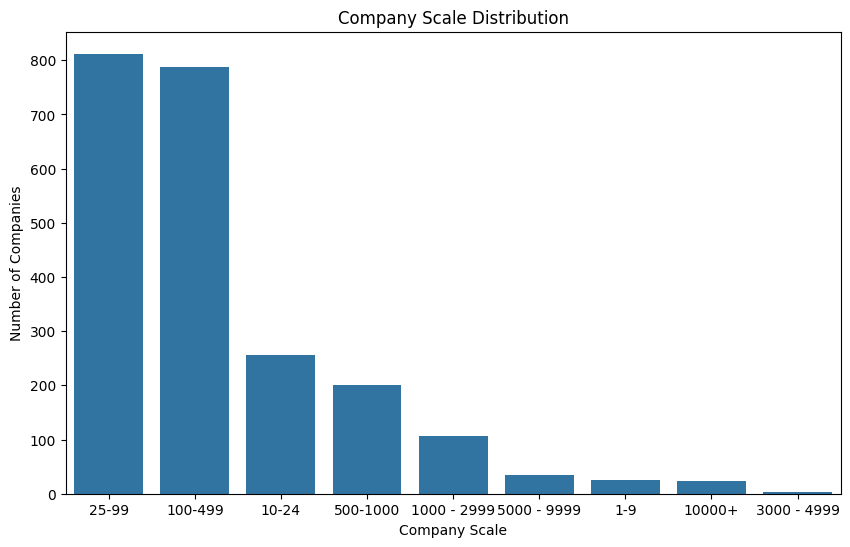

In [8]:
# plot company_scale
company_scale_counts = df['company_scale'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=company_scale_counts.index, y=company_scale_counts.values)
plt.title('Company Scale Distribution')
plt.xlabel('Company Scale')
plt.ylabel('Number of Companies')
plt.show()

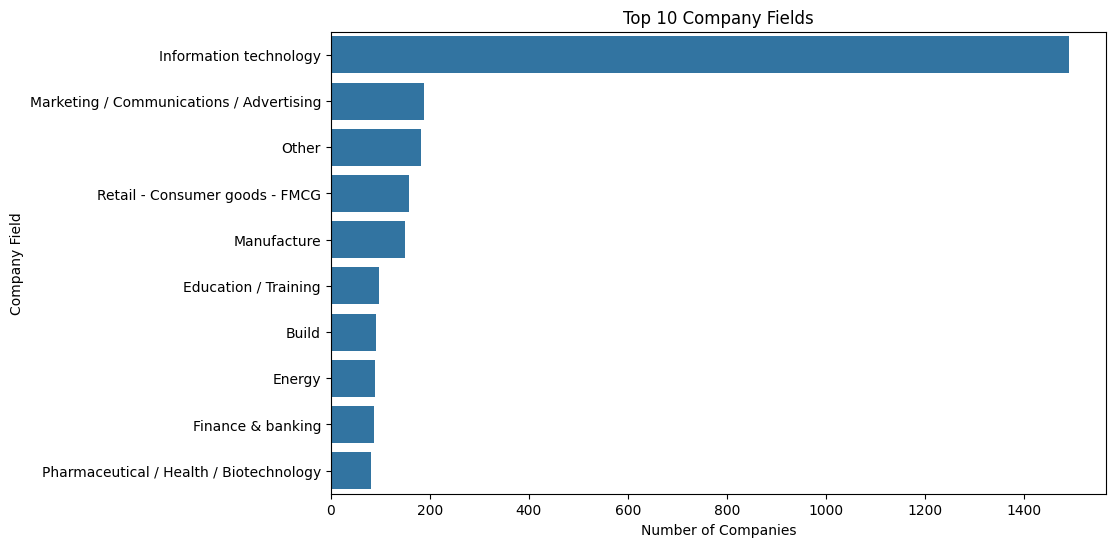

In [9]:
# plot company_field
company_field_counts = df['company_field'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=company_field_counts.values, y=company_field_counts.index)
plt.title('Top 10 Company Fields')
plt.xlabel('Number of Companies')
plt.ylabel('Company Field')
plt.show()


In [10]:
# rename manage to manager in position column
df['position'] = df['position'].replace('Manage', 'Manager')


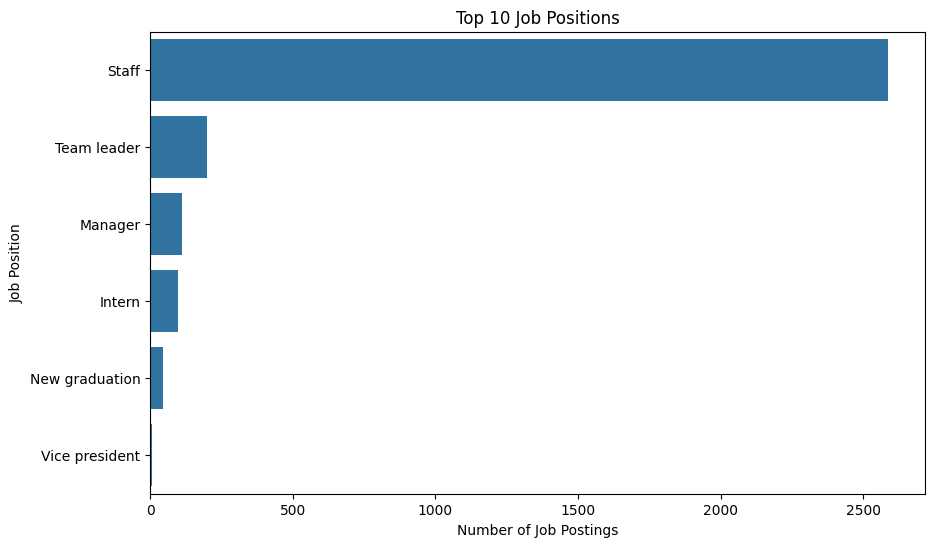

In [11]:
# position
position_counts = df['position'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.values, y=position_counts.index)
plt.title('Top 10 Job Positions')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Position')
plt.show()

In [12]:
df['education'].unique()

array(['bachelor', 'unknown', nan, 'Đại Học trở lên', 'master',
       'Cao Đẳng trở lên', 'bachelor, college', 'Trung cấp trở lên',
       'associate, college', 'highschool',
       'Trung học phổ thông (Cấp 3) trở lên', 'bachelor, master',
       'college', 'associate, bachelor, college', 'associate',
       'associate, highschool, secondary',
       'Trung học cơ sở (Cấp 2) trở lên'], dtype=object)

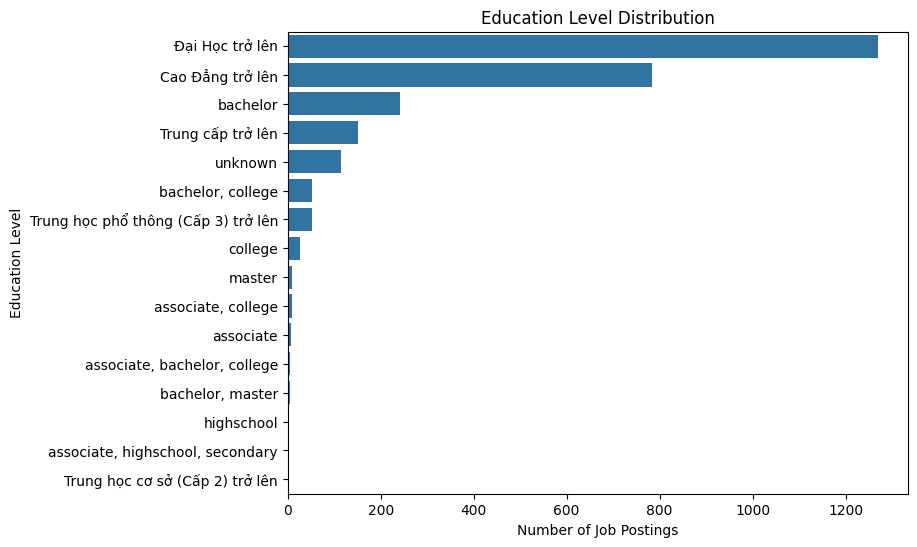

In [13]:
# education, vertical
education_counts = df['education'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.values, y=education_counts.index)
plt.title('Education Level Distribution')
plt.xlabel('Number of Job Postings')
plt.ylabel('Education Level')
plt.show()

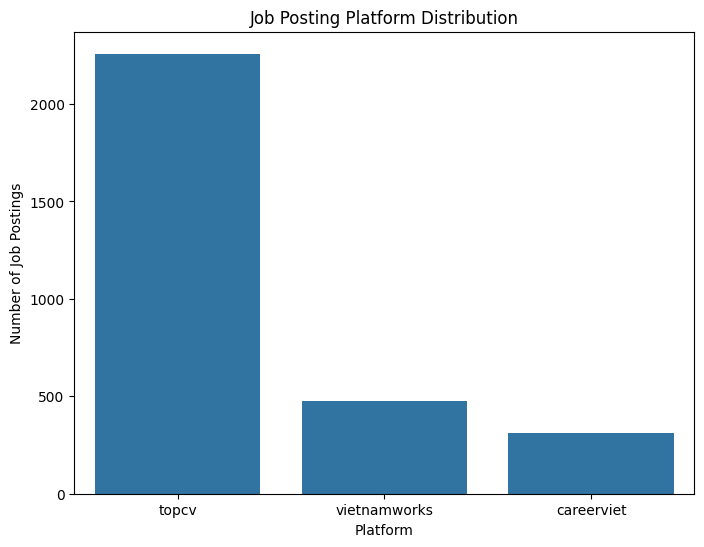

In [14]:
# platform
platform_counts = df['platform'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Job Posting Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Number of Job Postings')
plt.show()


Text(0, 0.5, 'Skills')

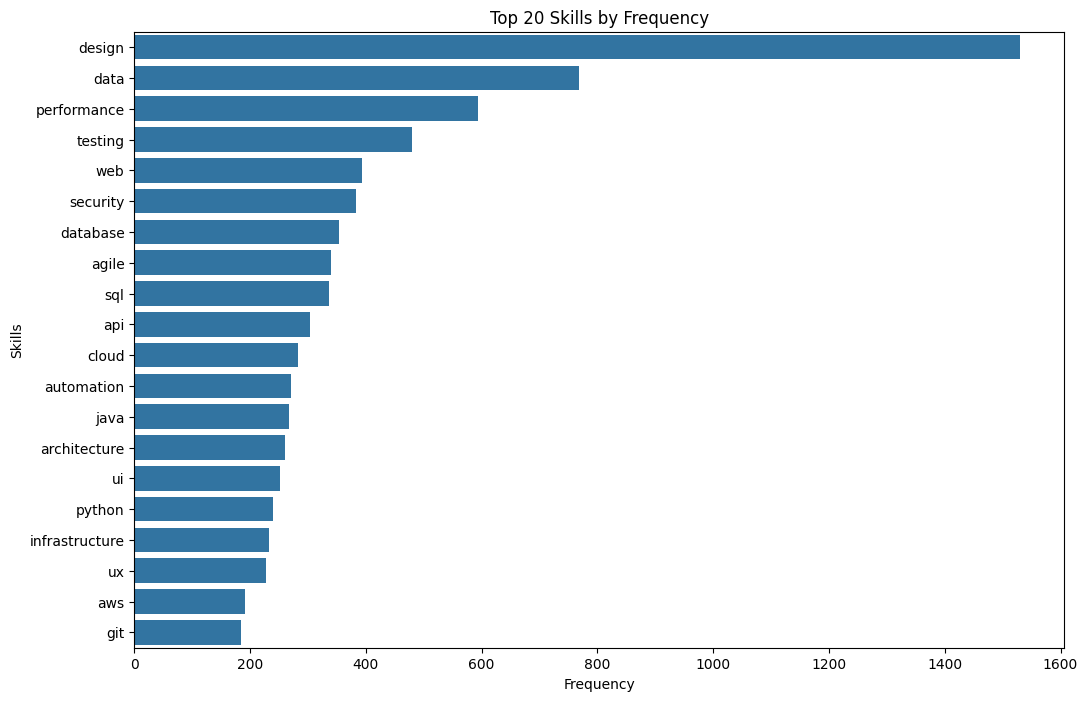

In [15]:
#skills
skills = df['skills'].str.split(',', expand=True).stack().str.strip()
top_20_skills = skills.value_counts().head(20)
# chart top 20 skills
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_skills.values, y=top_20_skills.index)
plt.title('Top 20 Skills by Frequency') 
plt.xlabel('Frequency')
plt.ylabel('Skills')

In [16]:
# Split skills and count their occurrences
skills_exploded = df['skills'].dropna().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
skill_counts = skills_exploded.value_counts()
print("Top Most Frequent Skills:")
print(skill_counts.head(10))

# Load skill.csv and map each skill to a corresponding skill group (group_skill)
skill_mapping = dict(zip(skill_df['skill'].str.strip().str.lower(), skill_df['group_skill'].str.strip()))

# Convert skills to lowercase to improve mapping accuracy
skills_exploded_lower = skills_exploded.str.lower()
mapped_group_skills = skills_exploded_lower.map(skill_mapping)

# Count the number of occurrences for each skill group
group_skill_counts = mapped_group_skills.value_counts(dropna=True)
print("\nFrequency of Skill Groups:")
print(group_skill_counts)

# For each skill group, list the top 5 most frequent individual skills
print("\nTop 5 Most Common Skills per Skill Group:")

# Merge individual skills and their mapped group skills into a single DataFrame
mapped_df = pd.DataFrame({'skill': skills_exploded_lower, 'group_skill': mapped_group_skills})

# Remove skills that could not be mapped to any group
mapped_df = mapped_df.dropna()

# Loop through each group_skill and print the top 5 associated skills
for group, group_data in mapped_df.groupby('group_skill'):
    top_skills = group_data['skill'].value_counts().head(5)
    print(f"\n▶️ Group: {group}")
    print(top_skills)


Top Most Frequent Skills:
design         1530
data            768
performance     593
testing         479
web             393
security        383
database        353
agile           339
sql             336
api             303
Name: count, dtype: int64

Frequency of Skill Groups:
Process & Methods      4538
OS & Infrastructure    3365
Languages              2361
Data Systems           2220
Libs & Frameworks      1424
Development Tools       913
Name: count, dtype: int64

Top 5 Most Common Skills per Skill Group:

▶️ Group: Data Systems
skill
data          768
database      353
mysql         181
oracle        129
postgresql    117
Name: count, dtype: int64

▶️ Group: Development Tools
skill
automation    270
git           185
jira          111
jenkins        54
gitlab         50
Name: count, dtype: int64

▶️ Group: Languages
skill
sql           336
java          267
python        240
javascript    179
c             169
Name: count, dtype: int64

▶️ Group: Libs & Frameworks
skill
api     

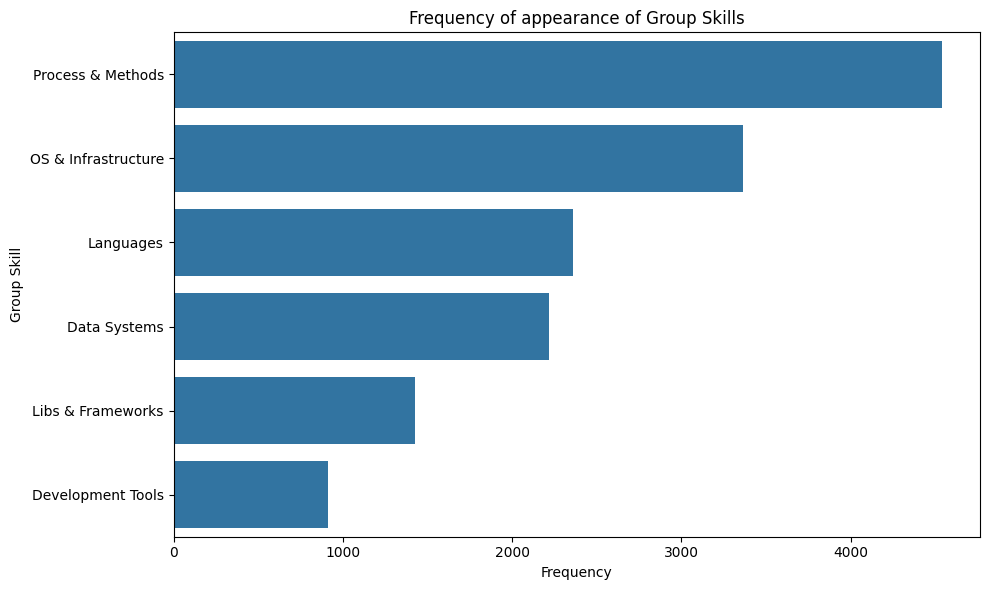

In [17]:
# group_skill
top_group_skills = group_skill_counts.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_group_skills.values, y=top_group_skills.index)
plt.title("Frequency of appearance of Group Skills")
plt.xlabel("Frequency")
plt.ylabel("Group Skill")
plt.tight_layout()
plt.show()


## Định lượng


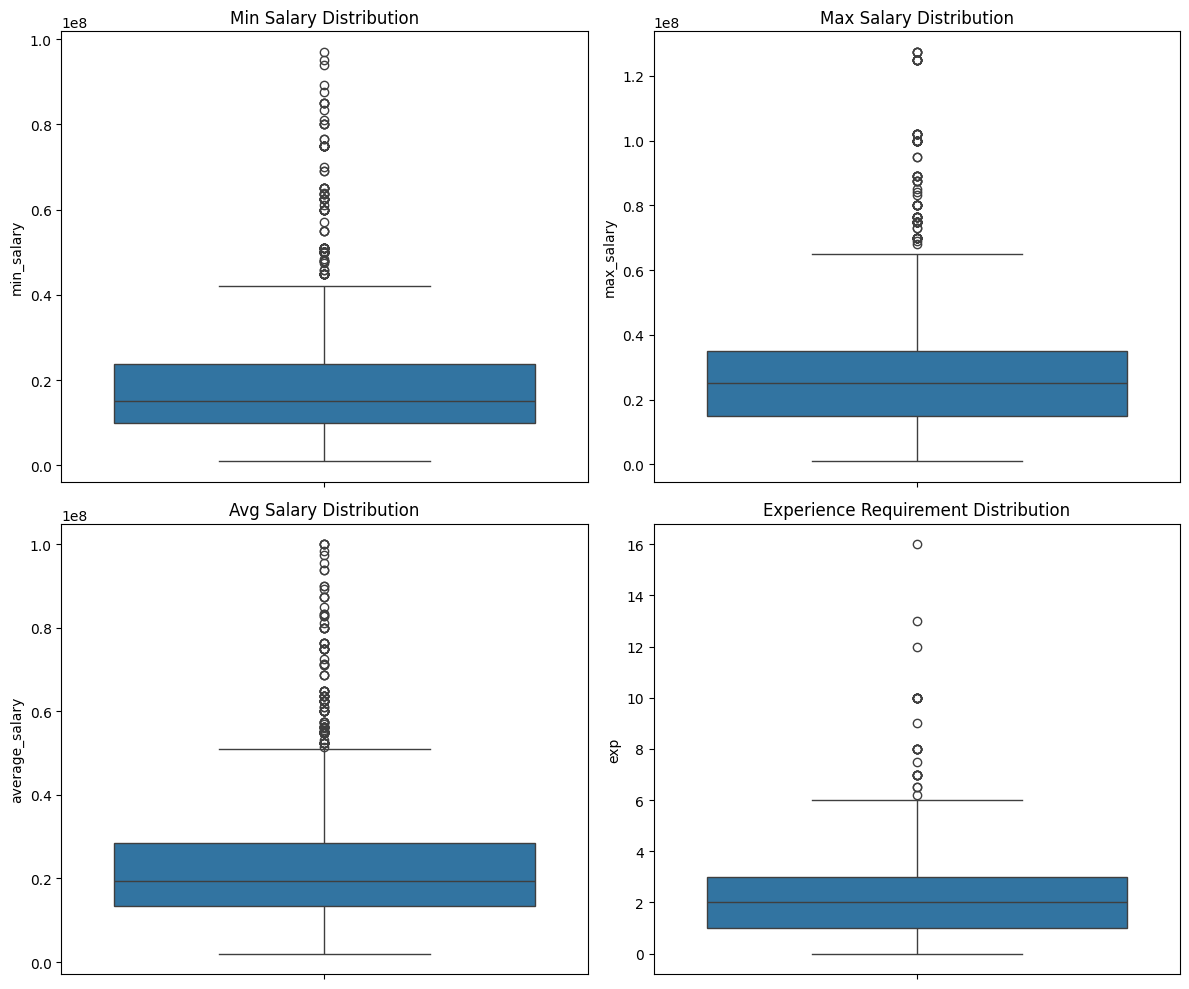

In [18]:
# boxplot min_salary, max_salary, avg_salary, exp
# 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=df['min_salary'], ax=axs[0, 0])
axs[0, 0].set_title('Min Salary Distribution')
sns.boxplot(y=df['max_salary'], ax=axs[0, 1])
axs[0, 1].set_title('Max Salary Distribution')
sns.boxplot(y=df['average_salary'], ax=axs[1, 0])
axs[1, 0].set_title('Avg Salary Distribution')
sns.boxplot(y=df['exp'], ax=axs[1, 1])
axs[1, 1].set_title('Experience Requirement Distribution')
plt.tight_layout()
plt.show()

# DATA VALIDATION

In [19]:
df.head()

,city_text,exp,item_tag,company_scale,company_field,position,education,min_salary,max_salary,average_salary,platform,job_des,job_require,skills,group_skill
0,Hà Nội,3.0,Product Owner,NaN,Information technology,Staff,bachelor,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc Navigos Search's Client is loo...,Yêu cầu công việc - A Bachelor’s degree in a r...,"agile, blockchain, data, go, performance, qa, ...","Data Systems, Languages, OS & Infrastructure, ..."
1,"Hà Nội, Đà Nẵng",6.0,Technical Lead (Nextjs & Nestjs) Remote,NaN,Information technology,Team leader,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc What You'll Be Doing • Lead ar...,Yêu cầu công việc • 6+ years of full-stack dev...,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS..."
2,"Hà Nội, Đà Nẵng",6.0,Technical Lead (Nextjs & Nestjs)_Remote,NaN,Information technology,Team leader,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc What You'll Be Doing • Lead ar...,Yêu cầu công việc • 6+ years of full-stack dev...,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS..."
3,Hà Nội,3.5,Editorial - Retouch Specialist,NaN,Information technology,Staff,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việcTOP 4 JOB RESPONSIBILITIES Qual...,Yêu cầu công việcRequirements & Experience • 3...,NaN,NaN
4,Hồ Chí Minh,8.0,116935 - Principal Backend Engineer - IT softw...,NaN,Information technology,Staff,NaN,97000000.0,100000000.0,98500000.0,careerviet,Mô tả Công việc - Work Location: Phu N...,YÊU CẦU CÔNG VIỆC <Necessary Skill / Experienc...,"agile, architecture, design, docker, express, ...","Languages, Libs & Frameworks, OS & Infrastruct..."


In [20]:
df.dtypes
df.isnull().sum()

city_text           3
exp                 0
item_tag            1
company_scale     798
company_field       0
position            0
education         312
min_salary          0
max_salary          0
average_salary      0
platform            0
job_des             1
job_require         0
skills            325
group_skill       325
dtype: int64

In [21]:
df[(df['exp'] < 0)]

,city_text,exp,item_tag,company_scale,company_field,position,education,min_salary,max_salary,average_salary,platform,job_des,job_require,skills,group_skill


In [22]:
df[(df['min_salary'] > df['max_salary'])].count()

city_text         23
exp               23
item_tag          23
company_scale     22
company_field     23
position          23
education         22
min_salary        23
max_salary        23
average_salary    23
platform          23
job_des           23
job_require       23
skills            20
group_skill       20
dtype: int64

In [23]:
Q1 = df['average_salary'].quantile(0.25)
Q3 = df['average_salary'].quantile(0.75)
df[(df['average_salary'] < Q1-1.5*(Q3-Q1)) | (df['average_salary'] > Q3+1.5*(Q3-Q1))]

,city_text,exp,item_tag,company_scale,company_field,position,education,min_salary,max_salary,average_salary,platform,job_des,job_require,skills,group_skill
0,Hà Nội,3.0,Product Owner,NaN,Information technology,Staff,bachelor,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc Navigos Search's Client is loo...,Yêu cầu công việc - A Bachelor’s degree in a r...,"agile, blockchain, data, go, performance, qa, ...","Data Systems, Languages, OS & Infrastructure, ..."
1,"Hà Nội, Đà Nẵng",6.0,Technical Lead (Nextjs & Nestjs) Remote,NaN,Information technology,Team leader,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc What You'll Be Doing • Lead ar...,Yêu cầu công việc • 6+ years of full-stack dev...,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS..."
2,"Hà Nội, Đà Nẵng",6.0,Technical Lead (Nextjs & Nestjs)_Remote,NaN,Information technology,Team leader,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việc What You'll Be Doing • Lead ar...,Yêu cầu công việc • 6+ years of full-stack dev...,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS..."
3,Hà Nội,3.5,Editorial - Retouch Specialist,NaN,Information technology,Staff,unknown,75000000.0,125000000.0,100000000.0,vietnamworks,Mô tả công việcTOP 4 JOB RESPONSIBILITIES Qual...,Yêu cầu công việcRequirements & Experience • 3...,NaN,NaN
4,Hồ Chí Minh,8.0,116935 - Principal Backend Engineer - IT softw...,NaN,Information technology,Staff,NaN,97000000.0,100000000.0,98500000.0,careerviet,Mô tả Công việc - Work Location: Phu N...,YÊU CẦU CÔNG VIỆC <Necessary Skill / Experienc...,"agile, architecture, design, docker, express, ...","Languages, Libs & Frameworks, OS & Infrastruct..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Hồ Chí Minh,5.0,Backend Developer,25-99,Information technology,Staff,Cao Đẳng trở lên,35000000.0,70000000.0,52500000.0,topcv,"Mô tả công việc As part of our rapid growth, w...",Yêu cầu ứng viên Must-have:Minimum 8 years of ...,".net, agile, api, architecture, asp.net, aws, ...","Data Systems, Languages, Libs & Frameworks, OS..."
124,Hà Nội,4.0,System Engineer (Shift Work),NaN,Finance & banking,Staff,bachelor,25000000.0,80000000.0,52500000.0,vietnamworks,Mô tả công việc Job Purpose: The System Engine...,Yêu cầu công việc - A bachelor’s degree in com...,"database, infrastructure, linux, performance","Data Systems, OS & Infrastructure, Process & M..."
125,Hà Nội,3.0,IT Corebanking T24 System Operations,NaN,Finance & banking,Staff,bachelor,25000000.0,80000000.0,52500000.0,vietnamworks,Mô tả công việc Key Accountabilities - Collabo...,Yêu cầu công việc - A bachelor’s degree in com...,infrastructure,OS & Infrastructure
126,Hà Nội,4.0,Senior SOC Operation (Shift Work),NaN,Finance & banking,Staff,bachelor,25000000.0,80000000.0,52500000.0,vietnamworks,Mô tả công việc Key Accountabilities: · Co-ope...,Yêu cầu công việc Qualifications: · Bachelor's...,"automation, aws, cisco, cloud, infrastructure,...","Data Systems, Development Tools, OS & Infrastr..."


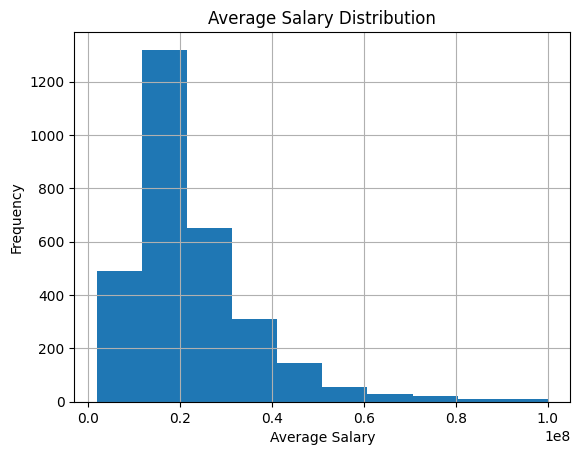

In [24]:
df['average_salary'].hist()
plt.title('Average Salary Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()


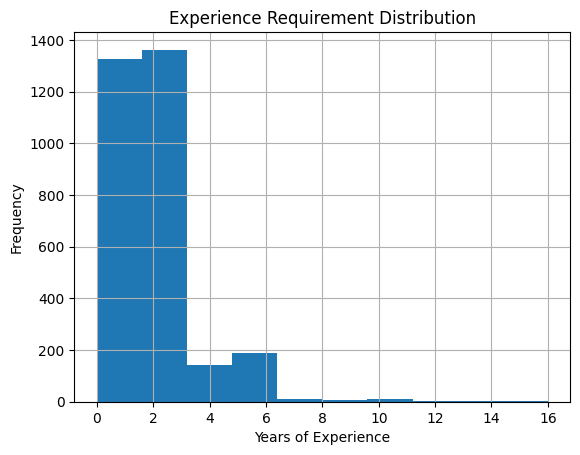

In [25]:
df['exp'].hist()
plt.title('Experience Requirement Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()


# VISUALIZATION

## Average Salary Distribution by Experience Level

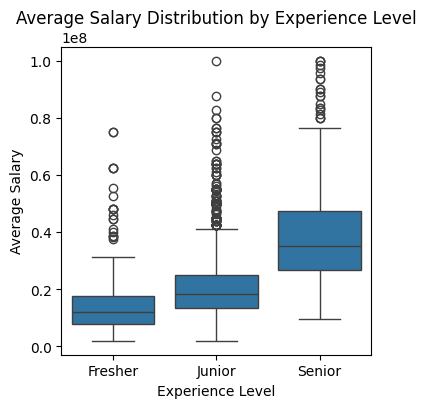

In [26]:
def categorize_experience(exp):
    if exp < 1:
        return 'Fresher'
    elif 1 <= exp <= 3:
        return 'Junior'
    else:
        return 'Senior'

df['exp_level'] = df['exp'].apply(categorize_experience)

plt.figure(figsize=(4, 4))
sns.boxplot(x='exp_level', y='average_salary', data=df, order=['Fresher', 'Junior', 'Senior'])
plt.title('Average Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.show()


## Job Count by Position Level Across Platforms

In [27]:
def categorize_experience(exp):
    if exp < 1:
        return 'Fresher'
    elif 1 <= exp <= 3:
        return 'Junior'
    else:
        return 'Senior'

df['exp_level'] = df['exp'].apply(categorize_experience)


In [28]:
count_df = df.groupby(['platform', 'exp_level']).size().reset_index(name='count')
total_per_platform = count_df.groupby('platform')['count'].transform('sum')
count_df['percentage'] = count_df['count'] / total_per_platform * 100


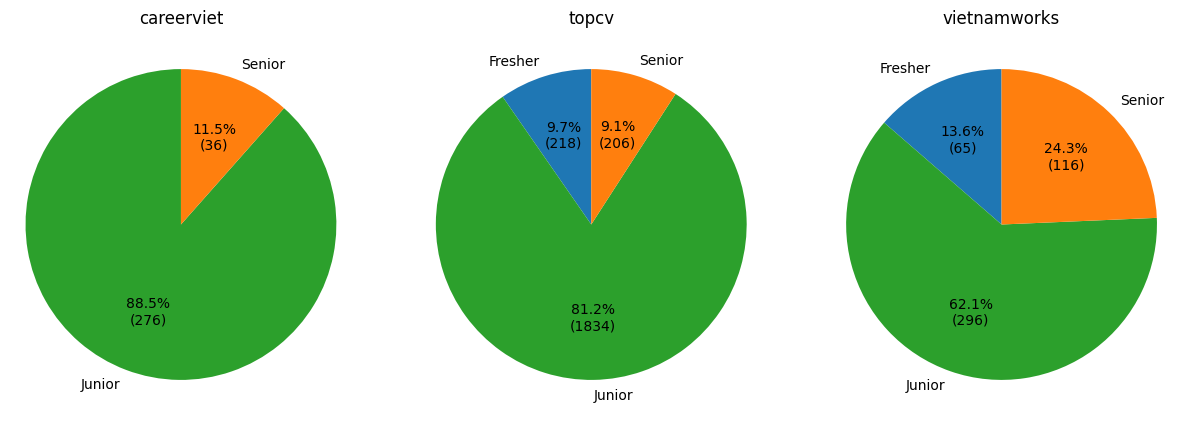

In [29]:
# Define platforms and color_map
platforms = count_df['platform'].unique()
color_map = {
    'Fresher': '#1f77b4',  
    'Junior': '#2ca02c',   
    'Senior': '#ff7f0e'    
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, platform in enumerate(platforms):
    platform_data = count_df[count_df['platform'] == platform]
    
    # Ensure the correct order and add any missing job levels (if applicable), then remove levels with a count of 0
    platform_data = (
        platform_data.set_index('exp_level')
        .reindex(['Fresher', 'Junior', 'Senior'])
        .fillna(0)
        .reset_index()
    )

    # Remove rows with a count of 0
    platform_data = platform_data[platform_data['count'] > 0]

    labels = platform_data['exp_level']
    sizes = platform_data['percentage']
    counts = platform_data['count']
    colors = [color_map[label] for label in labels]

    def make_autopct(counts):
        def autopct(pct):
            total = sum(counts)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'
        return autopct

    axes[i].pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct=make_autopct(counts),
        startangle=90
    )
    axes[i].set_title(f'{platform}')
    axes[i].axis('equal')


##  Boxplot of Salaries by Platform


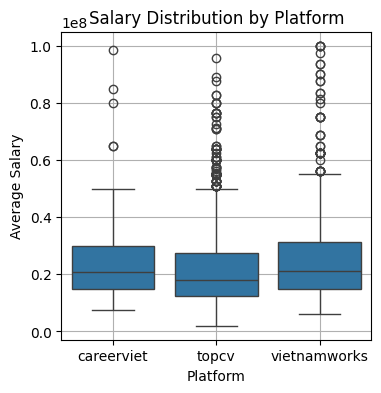

In [30]:
plt.figure(figsize=(4, 4))
sns.boxplot(
    x='platform',
    y='average_salary',
    data=df,
    order=['careerviet', 'topcv', 'vietnamworks']
)
plt.title('Salary Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()



## Boxplot of salaries by company field (Top 5 most common sectors)

C:\Users\vthuy\AppData\Local\Temp\ipykernel_17196\2549830490.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(wrapped_labels)


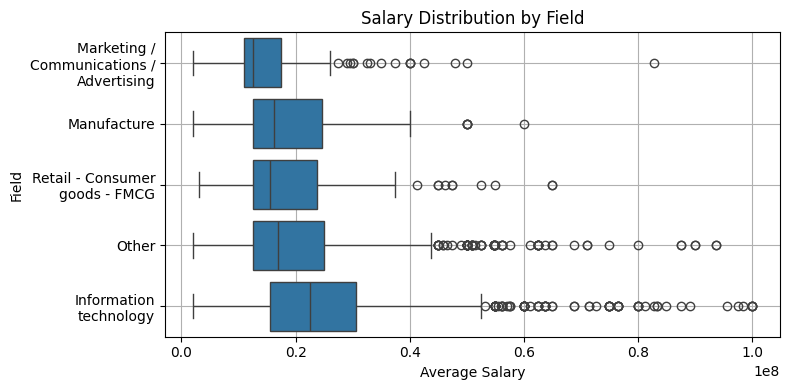

In [31]:

main_fields = [
    'Information technology',
    'Marketing / Communications / Advertising',
    'Retail - Consumer goods - FMCG',
    'Manufacture'
]


df['field_grouped'] = df['company_field'].apply(lambda x: x if x in main_fields else 'Other')

order = df.groupby('field_grouped')['average_salary'].mean().sort_values(ascending=True).index  # tăng dần cho biểu đồ ngang

import textwrap
wrapped_labels = [textwrap.fill(label, width=20) for label in order]

plt.figure(figsize=(8, 4))
ax = sns.boxplot(y='field_grouped', x='average_salary', data=df, order=order)
plt.title('Salary Distribution by Field')
plt.xlabel('Average Salary')
plt.ylabel('Field')

ax.set_yticklabels(wrapped_labels)

plt.grid(True)
plt.tight_layout()
plt.show()

# Data Preparation & Feature Engineering

## Missing value

In [32]:
df.dtypes
df.isnull().sum()

city_text           3
exp                 0
item_tag            1
company_scale     798
company_field       0
position            0
education         312
min_salary          0
max_salary          0
average_salary      0
platform            0
job_des             1
job_require         0
skills            325
group_skill       325
exp_level           0
field_grouped       0
dtype: int64

In [33]:
# skills và group_skill có giá trị missing, ta sẽ điền giá trị missing này bằng 'Not specified'
df['skills'].fillna('Not specified', inplace=True)

C:\Users\vthuy\AppData\Local\Temp\ipykernel_17196\11647670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skills'].fillna('Not specified', inplace=True)


In [34]:
# city_text có giá trị missing, ta sẽ điền giá trị missing này bằng mode
df['city_text'].fillna(df['city_text'].mode()[0], inplace=True)

C:\Users\vthuy\AppData\Local\Temp\ipykernel_17196\3874760085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city_text'].fillna(df['city_text'].mode()[0], inplace=True)


## Outlier

In [35]:
# có 23 giá trị min_salary > max_salary, chiếm phần trăm rất nhỏ so với tổng dữ liệu nên ta sẽ xóa các dòng này
df = df[df['min_salary'] <= df['max_salary']]

## Feature Scaling

In [36]:
import numpy as np 
# chuẩn hóa dữ liệu cho cột salary và experience
num_cols = ['min_salary', 'max_salary', 'average_salary', 'exp']

for col in num_cols:
    df[col + '_log'] = np.log1p(df[col])



In [37]:
df['exp_log_z'] = (df['exp_log'] - df['exp_log'].mean()) / df['exp_log'].std()
df['min_salary_log_z'] = (df['min_salary_log'] - df['min_salary_log'].mean()) / df['min_salary_log'].std()
df['max_salary_log_z'] = (df['max_salary_log'] - df['max_salary_log'].mean()) / df['max_salary_log'].std()
df['average_salary_log_z'] = (df['average_salary_log'] - df['average_salary_log'].mean()) / df['average_salary_log'].std()


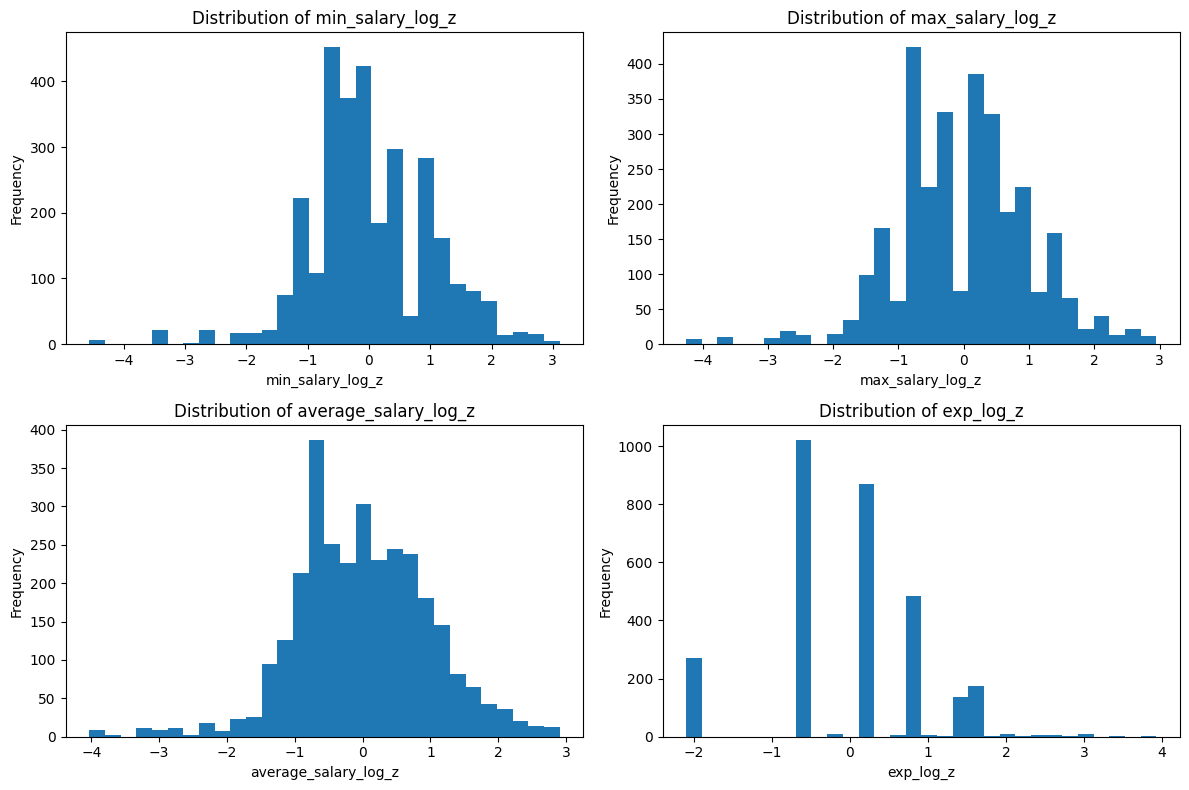

In [38]:
import matplotlib.pyplot as plt

plot_cols = [
    'min_salary_log_z',
    'max_salary_log_z',
    'average_salary_log_z',
    'exp_log_z'
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(plot_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [39]:
df.columns

Index(['city_text', 'exp', 'item_tag', 'company_scale', 'company_field',
       'position', 'education', 'min_salary', 'max_salary', 'average_salary',
       'platform', 'job_des', 'job_require', 'skills', 'group_skill',
       'exp_level', 'field_grouped', 'min_salary_log', 'max_salary_log',
       'average_salary_log', 'exp_log', 'exp_log_z', 'min_salary_log_z',
       'max_salary_log_z', 'average_salary_log_z'],
      dtype='object')

## Delete redundant columns

In [40]:
# xóa cột không cần thiết
# education và company_scale có nhiều giá trị missing, xóa 2 cột này
columns = ['exp', 'item_tag', 'education', 'company_scale', 'min_salary', 'max_salary', 'job_des', 'job_require', 'min_salary_log', 'max_salary_log', 'average_salary_log', 'exp_log', 'average_salary','exp_level', 'field_grouped', 'min_salary_log_z', 'max_salary_log_z']

df.drop(columns=columns, inplace=True)

In [41]:
df.head()

,city_text,company_field,position,platform,skills,group_skill,exp_log_z,average_salary_log_z
0,Hà Nội,Information technology,Staff,vietnamworks,"agile, blockchain, data, go, performance, qa, ...","Data Systems, Languages, OS & Infrastructure, ...",0.850560,2.903820
1,"Hà Nội, Đà Nẵng",Information technology,Team leader,vietnamworks,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS...",2.041137,2.903820
2,"Hà Nội, Đà Nẵng",Information technology,Team leader,vietnamworks,"api, architecture, design, docker, graphql, pe...","Data Systems, Languages, Libs & Frameworks, OS...",2.041137,2.903820
3,Hà Nội,Information technology,Staff,vietnamworks,Not specified,NaN,1.101143,2.903820
4,Hồ Chí Minh,Information technology,Staff,careerviet,"agile, architecture, design, docker, express, ...","Languages, Libs & Frameworks, OS & Infrastruct...",2.575805,2.877022


## Categorical Features

In [42]:
df.columns

Index(['city_text', 'company_field', 'position', 'platform', 'skills',
       'group_skill', 'exp_log_z', 'average_salary_log_z'],
      dtype='object')

### Label Encoding 

In [43]:
from sklearn.preprocessing import LabelEncoder

column_need_label_encode = ['city_text', 'company_field', 'platform']

le = LabelEncoder()
for col in column_need_label_encode:
    df[col] = le.fit_transform(df[col])


### Ordinal Encoding

In [44]:
ordinal_map = {
    'Intern': 0,
    'New graduation': 1,
    'Staff': 2,
    'Team leader': 3,
    'Manager': 4,
    'Vice president': 5
}

In [45]:
df['position'] = df['position'].map(ordinal_map)


### One hot encoding

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer

skill_cols = ['skills', 'group_skill']

for col in skill_cols:
    df[col] = df[col].fillna('').apply(
        lambda x: [s.strip() for s in x.split(',') if s.strip()]
    )


In [47]:
mlb = MultiLabelBinarizer()

skill_ohe = mlb.fit_transform(df['skills'])
skill_df = pd.DataFrame(
    skill_ohe,
    columns=[f'skill_{c}' for c in mlb.classes_],
    index=df.index
)

df = pd.concat([df, skill_df], axis=1)


In [48]:
mlb = MultiLabelBinarizer()

group_skill_ohe = mlb.fit_transform(df['group_skill'])
group_skill_df = pd.DataFrame(
    group_skill_ohe,
    columns=[f'group_skill_{c}' for c in mlb.classes_],
    index=df.index
)

df = pd.concat([df, group_skill_df], axis=1)


In [49]:
df = df.drop(columns=['skills', 'group_skill'])

# SAVE DATASET AND MODELS

In [50]:
# save as csv 
df.to_csv('../data/job_en_final.csv', index=False)

In [51]:
df.columns

Index(['city_text', 'company_field', 'position', 'platform', 'exp_log_z',
       'average_salary_log_z', 'skill_.net', 'skill_3d', 'skill_Not specified',
       'skill_agile',
       ...
       'skill_wpf', 'skill_xamarin', 'skill_xcode', 'skill_xml',
       'group_skill_Data Systems', 'group_skill_Development Tools',
       'group_skill_Languages', 'group_skill_Libs & Frameworks',
       'group_skill_OS & Infrastructure', 'group_skill_Process & Methods'],
      dtype='object', length=215)

In [56]:
FEATURE_COLUMNS = (
    ["city_text_enc", "company_field_enc", "platform_enc", "position_enc"]
    + [c for c in df.columns if c.startswith("skill_")]
    + [c for c in df.columns if c.startswith("group_skill_")]
    + ["exp_log_z"]   
)


In [52]:
city_text = LabelEncoder()
company_field = LabelEncoder()
platform = LabelEncoder()
df["city_text_enc"] = city_text.fit_transform(df["city_text"])
df["company_field_enc"] = company_field.fit_transform(df["company_field"])
df["platform_enc"] = platform.fit_transform(df["platform"])

In [53]:
from sklearn.preprocessing import OrdinalEncoder

position_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)
df["position_enc"] = position_encoder.fit_transform(
    df[["position"]]
)


In [61]:
import joblib

pipeline = {
    "encoders": {
        "city_text": city_text,
        "company_field": company_field,
        "platform": platform,
        "position": position_encoder
    },
    "skill_mlb": skill_ohe,                 
    "group_skill_mlb": group_skill_ohe,     
    "feature_columns": FEATURE_COLUMNS,
}

joblib.dump(pipeline, "../pipeline/preprocess.pkl", compress=3)


['../pipeline/preprocess.pkl']